# Notebook KNN3: Klassifikation

In diesem Notebook wollen wir ein neuronales Netz konstruieren, welches Daten klassifizieren soll.  Wir betrachten hier bei zwei fälle: Datensatz 1 und Datensatz 2.

Aktivieren Sie die folgende Zelle, um die nötigen Programmpakete und die Daten zu laden.

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

!git clone "https://github.com/Sammy-Jankins/KNN_Lernen.git" "KNN_Lernen" 2> /dev/null
from KNN_Lernen import KNN_Funktionen as knn

# Wir laden Datensatz 1.
x_train, y_train = knn.Daten_1_KNN3(100, 100)

# Wir laden Datensatz 2.
x_train2, y_train2 = knn.Daten_2_KNN3(70, 70)

#Datensatz 1



Datensatz 1 besteht aus 30 blauen (x,y)-Punkten und aus 30 roten. Hierbei wird blau als 0 und rot als 1 dargestellt. 

Die Liste x_train enthält die (x,y)-Punkte und y_train enthält die Farbe. Z.B. erhalten wir für den ersten Punkt (die Zählung beginnt bei 0):


In [0]:
print("(x,y)-Koordinaten des ersten Punktes: " + str(x_train[0]))
print("Farbe des ersten Punktes: " + str(y_train[0]))

(x,y)-Koordinaten des ersten Punktes: [0.22032814 0.1266337 ]
Farbe des ersten Punktes: 1.0


Der folgende Befehl zeigt uns alle 60 Punkte:

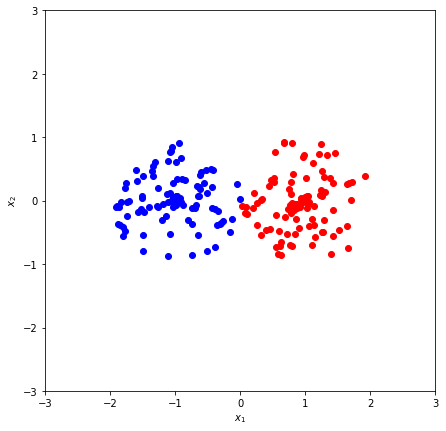

In [0]:
knn.Punkte_blau_rot(x_train, y_train)  

# Ein KNN mittels tensorflow definieren und trainieren


Der Plot der Daten legt nahe, dass ein lineares Modell zugrunde liegt.  Also müsste ein KNN mit nur einer Input-Schicht (mit Bias-Neuron) - und keiner verborgenen Schicht - die Daten erlernen können.

Wir verwenden nun das Softwarepaket "tensorflow", mit welchem mit nur zwei Befehlen solch ein neuronales Netz konstruiert werden kann. Der Befehl `model = Sequential()` dient als Start-Befehl. Im zweiten Befehl

`model.add(Dense(units=1, activation='sigmoid', use_bias=True, input_shape=(2,)))`

fügen wir eine Schicht mit einem Neuron (`units=1`) und Sigmoid-Aktivierungsfunktion (`activation='sigmoid'`) hinzu. Die Anzahl der Input-Neuronen wird mit `input_shape=(2,)` festgelegt. Die Anweisung 
`use_bias=True` bewirkt, dass zusätzlich zu den zwei Input-Neuronen ein Bias-Neuron verwendet wird.

Fertig! 



Mit `model.summary()` wird unser KNN zusammengefasst und die Anzahl der zu erlernenden Parameter berechnet. (In diesem Fall also 3.)

In [0]:
model = Sequential()
model.add(Dense(units=1, activation='sigmoid', use_bias=True, input_shape=(2,)))
model.summary()

W0623 12:04:06.841112 139691385440128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 12:04:06.899335 139691385440128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 12:04:06.907509 139691385440128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Wir lassen nun unsere KNN trainieren. 

Wir verwenden das Gradientenverfahren und unsere übliche Fehlerfunktion (`mean_squared_error`).

Die Anzahl der Iterationen wird mit `epochs=1000` festgelegt.

In jedem Schritt berechnen wir die Fehler nur für eine zufällig gewählte Menge von Daten.   Die Anzahl dieser Daten wird mit `batch_size=1000` festgelegt. (Das Optimierungsverfahren heißt aus diesem Grund "stochastisches Gradientenverfahren", was den Befehl  `optimizer="sgd"`  erklärt.)

In einer Graphik sehen wir die Prozentzahl der richtig zugeordneten Punkte, einmal für die Trainingsdaten, einmal für die Testdaten. 

Instructions for updating:
Use tf.cast instead.


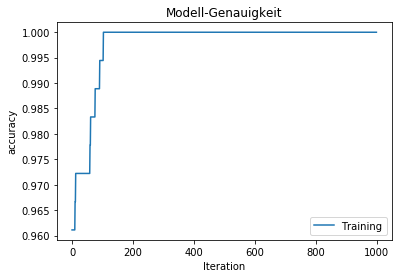

In [0]:
model.compile(optimizer="sgd", loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1000, epochs=1000, verbose=False, validation_split=.1)

plt.plot(history.history['acc'])
plt.title('Modell-Genauigkeit')
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.legend(['Training'], loc='best')
plt.show()


Wir können nun Vorhersagen mit unserem Modell machen. Z.B. für den ersten Punkt:

In [0]:
print("(x,y)-Koordinaten des ersten Punktes: " + str(x_train[0]))
print("Farbe des ersten Punktes: " + str(y_train[0]))
Vorhersage = model.predict(x_train[0].reshape(1,2))[0][0]
print("Vorhersage: " + str(Vorhersage))

(x,y)-Koordinaten des ersten Punktes: [0.98400786 0.12991075]
Farbe des ersten Punktes: 1.0
Vorhersage: 0.8305402


Unser Modell können wir farblich darstellen, indem wir die vorhergesagte Farbe verwenden: 

Vorhersage von Model 1 für Datensatz 1:


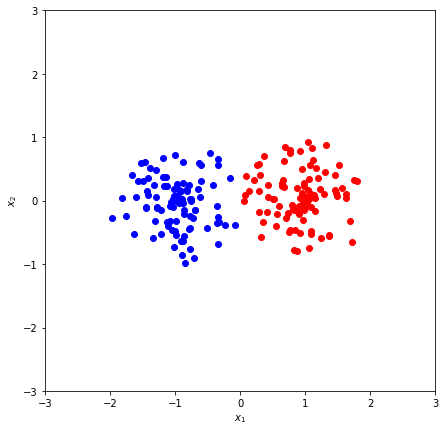

In [0]:
y_Vorhersage = model.predict(x_train)        
#plot_train_data_color(x_train, y_Vorhersage)
print('Vorhersage von Model 1 für Datensatz 1:')
knn.Punkte_blau_rot(x_train, y_Vorhersage)

Eine bessere Darstellung von dem, was das KNN erlernt hat, erhalten wir, wenn wir die gesamte Ebene einfärben. Jeder Punkt (x,y) erhält blau oder rot, je nachdem, welchen Wert "model1(x,y)" liefert. 

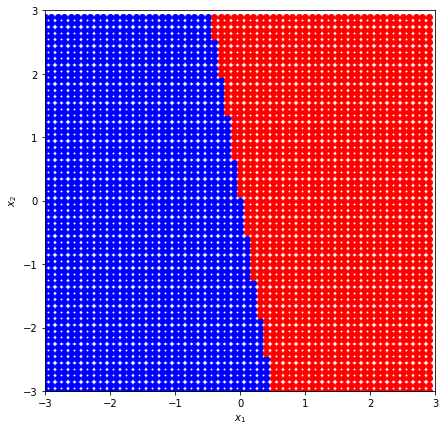

In [0]:
x_dense = np.zeros((60*60,2))
                   
for j in range(0,60):
    for k in range(0,60):
        x_dense[j*60+k][0]= j/10.0-3
        x_dense[j*60+k][1]= k/10.0-3

y_dense = model.predict(x_dense)   
trues = y_dense <=0.5 
trues = trues.reshape(1,-1)
trues = trues[0,:] 
knn.plot_train_data(x_dense[trues==True], x_dense[trues==False])
#knn.plot_train_data_color(x_dense, y_dense)


#Datensatz 2 

Schauen wir uns nun Datensatz 2 an:

Datensatz 2: 


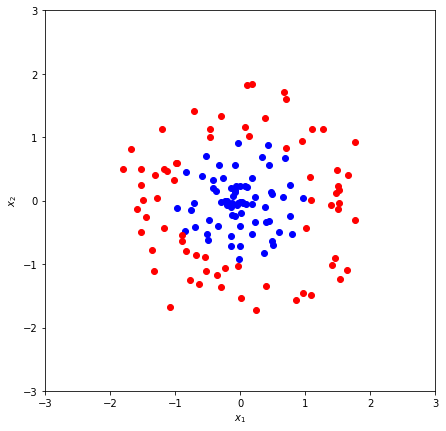

In [0]:
print("Datensatz 2: ")  

knn.Punkte_blau_rot(x_train2, y_train2)

Unser einfaches erstes Modell dürfte nicht in der Lage sein, die Daten zu erlernen. Probieren wir es trotzdem:

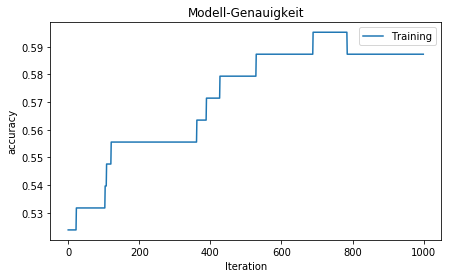

Vorhersage von Model 1 für Datensatz 2:


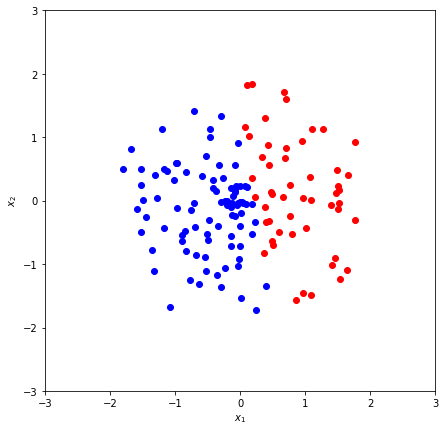

In [0]:
model.compile(optimizer="sgd", loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(x_train2, y_train2, batch_size=1000, epochs=1000, verbose=False, validation_split=.1)

plt.figure(figsize=(7,4))
plt.plot(history.history['acc'])
plt.title('Modell-Genauigkeit')
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.legend(['Training'], loc='best')
plt.show()

y_Vorhersage = model.predict(x_train2)        
print('Vorhersage von Model 1 für Datensatz 2:')
knn.Punkte_blau_rot(x_train2, y_Vorhersage)


Wir konstruieren nun ein KNN mit einer zusätzlichen verborgenen Schicht.

In [0]:
model2 = Sequential()

model2.add(Dense(units=32, activation='relu', use_bias=True, input_shape=(2,)))
model2.add(Dense(units=1, use_bias=True, activation='sigmoid'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


...und trainieren unser Modell:

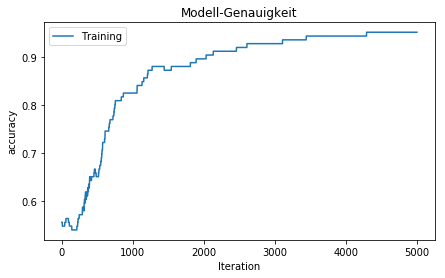

In [0]:
model2.compile(optimizer="sgd", loss='mean_squared_error', metrics=['accuracy'])
history = model2.fit(x_train2, y_train2, batch_size=1000, epochs=5000, verbose=False, validation_split=.1)

plt.figure(figsize=(7,4))
plt.plot(history.history['acc'])
plt.title('Modell-Genauigkeit')
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.legend(['Training'], loc='best')
plt.show()

Schließlich plotten wir wieder die Farben, die Modell 2 gelernt hat:

Vorhersage von Model 2 für Datensatz 2:


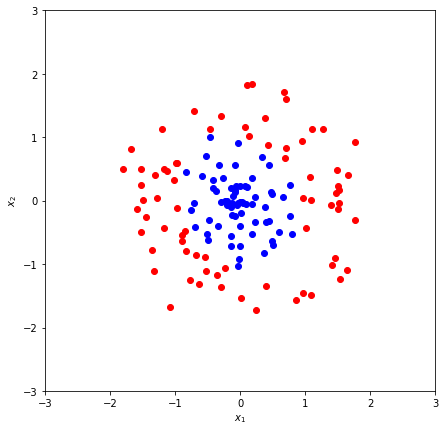

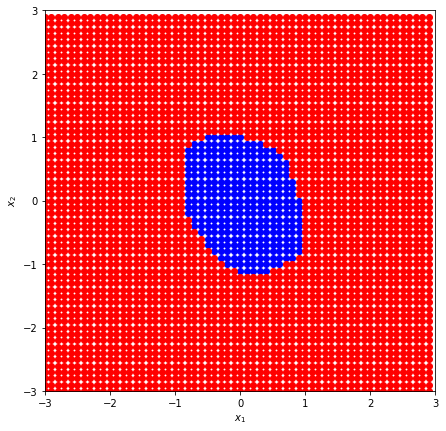

In [0]:
y_Vorhersage = model2.predict(x_train2)        
print('Vorhersage von Model 2 für Datensatz 2:')
knn.Punkte_blau_rot(x_train2, y_Vorhersage)
#plot_train_data_color(x_train2, y_Vorhersage)

x_dense = np.zeros((60*60,2))
                   
for j in range(0,60):
    for k in range(0,60):
        x_dense[j*60+k][0]= j/10.0-3
        x_dense[j*60+k][1]= k/10.0-3

y_dense = model2.predict(x_dense)   
trues = y_dense <=0.5 
trues = trues.reshape(1,-1)
trues = trues[0,:] 
knn.plot_train_data(x_dense[trues==True], x_dense[trues==False])


Schließlich noch ein etwas netterer Plot, bei dem wir die Farben kontinuierlich zwischen blau und rot wählen. 

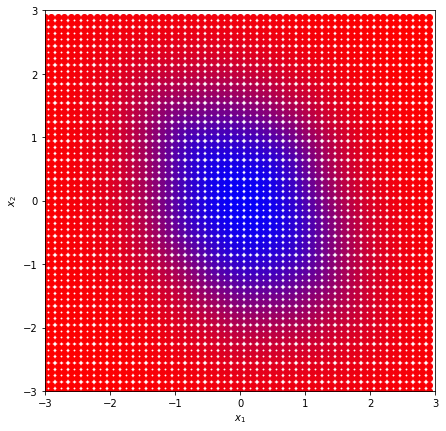

In [0]:
knn.plot_train_data_color(x_dense, y_dense)